In [1]:
import warnings                                                                                                #import libraries
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from time import process_time
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

import lightgbm as lgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [26]:
rootpath = r"~\OneDrive\Desktop\Programming\Datasets\california-house-prices"
df = pd.read_csv(rootpath + "/california_house_prices.csv")

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [28]:
df.shape

(20640, 10)

In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Text(0, 0.5, 'Probability')

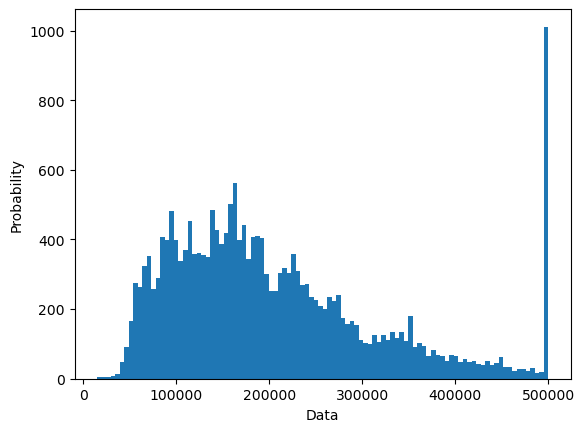

In [30]:
prices = df['median_house_value'].values
plt.hist(prices, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [31]:
df = df[df['median_house_value'] < df['median_house_value'].quantile(.99)]

Text(0, 0.5, 'Probability')

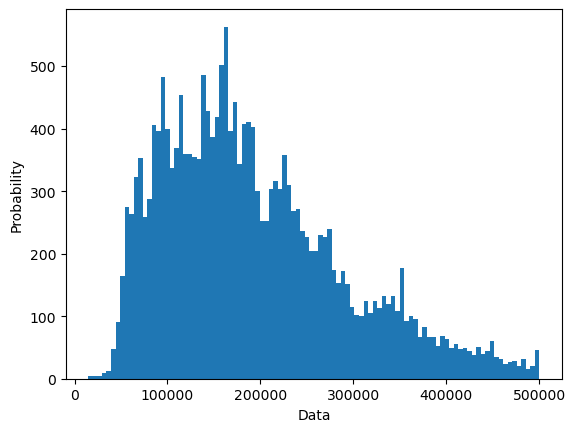

In [32]:
prices = df['median_house_value'].values
plt.hist(prices, bins=100)
plt.xlabel('Data')
plt.ylabel('Probability')

In [33]:
df.shape

(19675, 10)

In [34]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19675.000000,19675.000000,19675.000000,19675.000000,19475.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,-119.563192,35.651780,28.386277,2619.763659,539.645751,1440.812198,501.186023,3.676717,192477.921017
std,2.006108,2.149802,12.509113,2181.348207,422.413200,1143.648725,383.264636,1.570272,97711.509613
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,796.000000,282.000000,2.526800,116600.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450000,173800.000000
75%,-117.990000,37.730000,37.000000,3120.000000,648.000000,1746.000000,606.000000,4.582600,248200.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


In [35]:
df_g = pd.get_dummies(df, drop_first=True)

In [41]:
corr = df_g.corr()
corr.style.background_gradient(cmap='bwr')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924139,-0.102504,0.044304,0.069871,0.101061,0.055726,-0.009067,-0.046658,-0.061200,0.009610,-0.463314,0.049288
latitude,-0.924139,1.000000,0.006633,-0.033417,-0.067940,-0.113378,-0.072820,-0.078026,-0.148289,0.356273,-0.017012,0.346943,-0.164628
housing_median_age,-0.102504,0.006633,1.000000,-0.372009,-0.327308,-0.295124,-0.309438,-0.194784,0.067948,-0.232521,0.017862,0.245826,0.026060
total_rooms,0.044304,-0.033417,-0.372009,1.000000,0.934147,0.859590,0.921102,0.224207,0.143139,0.032074,-0.007639,-0.022037,-0.013515
total_bedrooms,0.069871,-0.067940,-0.327308,0.934147,1.000000,0.879176,0.979144,0.021903,0.074672,-0.008206,-0.004524,-0.019442,0.003269
population,0.101061,-0.113378,-0.295124,0.859590,0.879176,1.000000,0.908997,0.042360,0.011964,-0.029320,-0.010774,-0.057779,-0.022267
households,0.055726,-0.072820,-0.309438,0.921102,0.979144,0.908997,1.000000,0.046068,0.094894,-0.042244,-0.009343,-0.009474,0.004423
median_income,-0.009067,-0.078026,-0.194784,0.224207,0.021903,0.042360,0.046068,1.000000,0.642611,-0.218847,-0.009466,0.047563,-0.003664
median_house_value,-0.046658,-0.148289,0.067948,0.143139,0.074672,0.011964,0.094894,0.642611,1.000000,-0.499008,0.030670,0.157077,0.135889
ocean_proximity_INLAND,-0.061200,0.356273,-0.232521,0.032074,-0.008206,-0.029320,-0.042244,-0.218847,-0.499008,1.000000,-0.011229,-0.243207,-0.265385


In [42]:
all_features = list(cor.columns)
f_to_del = []

for i in cor.columns:
    if i == 'median_house_value':
        continue
    for j in cor.index:
        if all_features.index(j) >= all_features.index(i) or j == 'median_house_value':
            continue
        else:
            if abs(cor.loc[i,j]) > 0.8:
                if abs(cor.loc['median_house_value', i]) > abs(cor.loc['median_house_value', j]):
                    f_to_del.append(j)
                else:
                    f_to_del.append(i)

In [43]:
f_to_del = set(f_to_del)
print(len(f_to_del))
f_to_del

4


{'households', 'longitude', 'population', 'total_bedrooms'}

In [44]:
df_g.drop(['households', 'population', 'total_bedrooms'], axis=1, inplace=True)

In [45]:
df_g.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,3.8462,342200,0,0,1,0
